# Team #1
Patrick Hennessy

Matt Mossler

Urvi Sethia

Sierra Woodard

## Data Understanding

In [1]:
# import libraries
import seaborn as sns # For plotting and styling
import matplotlib.pyplot as plt # For showing plots and additional customization
import pandas as pd # primary data structure library
import numpy as np # useful for many scientific computing in Python
from scipy import stats # for hypothesis testing
import statsmodels.api as sm # for regression
from statsmodels.stats.outliers_influence import variance_inflation_factor  #forVIF

sns.set()
sns.set(rc={'figure.figsize':(12, 8)})

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,5) # set the figure width, height (in inches)
sns.set() #use set_theme() if your seaborn is v0.11.0

In [3]:
bikes = pd.read_csv('SeoulBike.csv')

In [4]:
# Display the first 5 rows
bikes.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
# Display the bottom 10 rows 
bikes.tail(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8750,30/11/2018,761,14,7.8,20,2.2,2000,-13.8,1.67,0.0,0.0,Autumn,No Holiday,Yes
8751,30/11/2018,768,15,7.0,20,3.3,1994,-14.4,1.21,0.0,0.0,Autumn,No Holiday,Yes
8752,30/11/2018,837,16,7.2,23,1.5,1945,-12.6,0.72,0.0,0.0,Autumn,No Holiday,Yes
8753,30/11/2018,1047,17,6.0,29,2.1,1877,-10.7,0.23,0.0,0.0,Autumn,No Holiday,Yes
8754,30/11/2018,1384,18,4.7,34,1.9,1661,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.00,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.00,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
# column data types
bikes.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [7]:
# show the info
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [8]:
# size of data
bikes.shape

(8760, 14)

In [9]:
# describe all numeric columns
bikes.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


## Data Preparation

In [10]:
# One-hot encoding for 'holiday' field
dummy_variable_1 = pd.get_dummies(bikes['Holiday'])
bikes['Holiday'] = dummy_variable_1['Holiday']
bikes[bikes['Holiday'] == 1]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
504,22/12/2017,196,0,-1.7,79,0.5,794,-4.8,0.0,0.0,0.8,Winter,1,Yes
505,22/12/2017,250,1,-1.6,79,0.6,784,-4.7,0.0,0.0,0.8,Winter,1,Yes
506,22/12/2017,161,2,-1.1,79,0.7,736,-4.2,0.0,0.0,0.8,Winter,1,Yes
507,22/12/2017,99,3,-0.6,76,0.5,789,-4.3,0.0,0.0,0.7,Winter,1,Yes
508,22/12/2017,64,4,-0.3,76,0.9,760,-4.0,0.0,0.0,0.7,Winter,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7507,9/10/2018,0,19,17.3,47,2.2,2000,5.8,0.0,0.0,0.0,Autumn,1,No
7508,9/10/2018,0,20,17.0,49,1.4,2000,6.1,0.0,0.0,0.0,Autumn,1,No
7509,9/10/2018,0,21,16.8,52,1.6,2000,6.8,0.0,0.0,0.0,Autumn,1,No
7510,9/10/2018,0,22,16.7,55,1.9,2000,7.6,0.0,0.0,0.0,Autumn,1,No


In [11]:
bikes.shape

(8760, 14)

In [12]:
# One-hot encoding for 'functioning day' field
dummy_variable_2 = pd.get_dummies(bikes['Functioning Day'])
bikes['Functioning Day'] = dummy_variable_2['Yes']
bikes[bikes['Functioning Day'] == 0]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
3144,11/4/2018,0,0,14.4,82,4.6,1041,11.3,0.0,0.0,0.0,Spring,0,0
3145,11/4/2018,0,1,13.6,81,3.6,886,10.3,0.0,0.0,0.0,Spring,0,0
3146,11/4/2018,0,2,12.7,80,3.9,885,9.3,0.0,0.0,0.0,Spring,0,0
3147,11/4/2018,0,3,11.6,81,3.1,687,8.4,0.0,0.0,0.0,Spring,0,0
3148,11/4/2018,0,4,10.2,83,3.5,554,7.4,0.0,0.0,0.0,Spring,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8251,9/11/2018,0,19,11.9,71,2.7,589,6.7,0.0,0.0,0.0,Autumn,0,0
8252,9/11/2018,0,20,11.9,72,2.5,526,7.0,0.0,0.0,0.0,Autumn,0,0
8253,9/11/2018,0,21,11.4,74,1.9,498,6.9,0.0,0.0,0.0,Autumn,0,0
8254,9/11/2018,0,22,11.2,75,1.7,478,6.9,0.0,0.0,0.0,Autumn,0,0


In [13]:
bikes.head(20)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,0,1
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,0,1
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,0,1
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,0,1
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,0,1
5,1/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,0,1
6,1/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,0,1
7,1/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,0,1
8,1/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,0,1
9,1/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,0,1


In [14]:
#finding missing data 

missing_data = bikes.isnull()
missing_data.head(10)

#there are no missing values in the data set

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
#binning windspeed into 3 categories
bins = np.linspace ( min(bikes['Wind speed (m/s)']) , max(bikes['Wind speed (m/s)']), 4)
bins

group_names = ['Low', 'Medium', 'High']

bikes['windspeed-binned'] = pd.cut(bikes['Wind speed (m/s)'], bins, labels=group_names, include_lowest=True)

In [16]:
#number of days of windspeed in each bin

bikes['Wind speed (m/s)'].value_counts()

1.1    420
1.2    403
1.0    388
0.9    388
0.8    385
      ... 
7.2      1
6.1      1
7.3      1
6.9      1
5.7      1
Name: Wind speed (m/s), Length: 65, dtype: int64

In [17]:
bikes.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,windspeed-binned
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,Low
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1,Low
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1,Low
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1,Low
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1,Low


## Data Exploration and Modeling

### Data Visualization

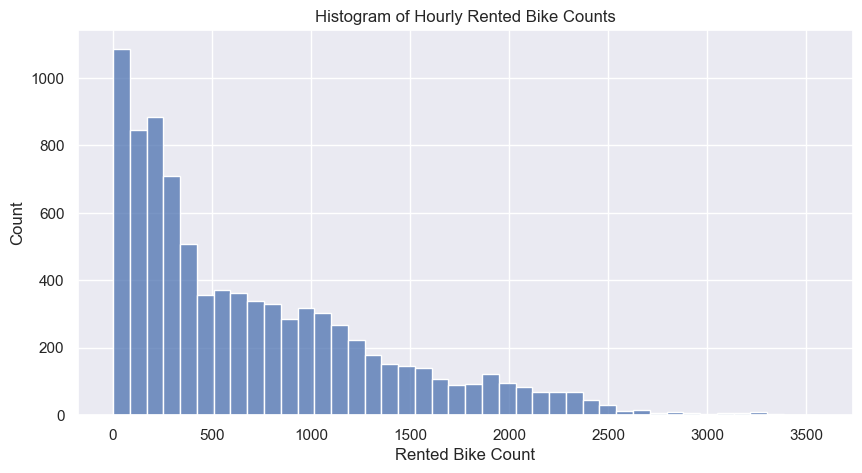

In [18]:
# Histogram of Hourly Rented Bike Counts
sns.histplot(bikes["Rented Bike Count"]).set_title('Histogram of Hourly Rented Bike Counts')
plt.show()

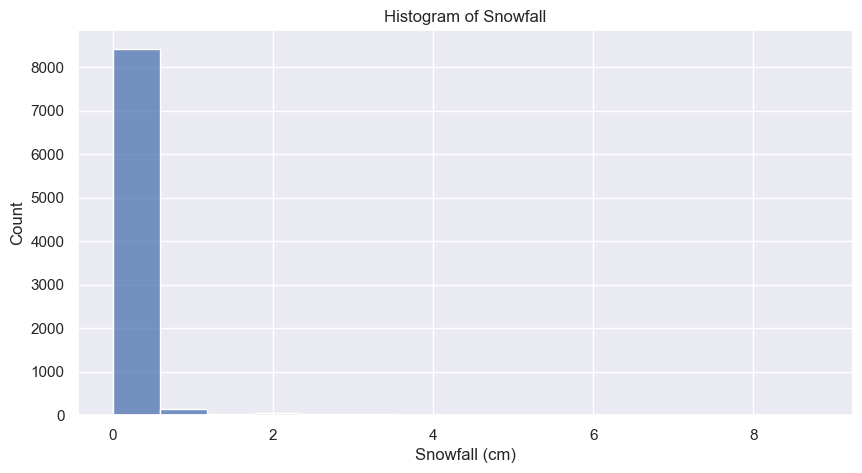

In [19]:
# Histogram of Hourly Rented Bike Counts
sns.histplot(bikes["Snowfall (cm)"]).set_title('Histogram of Snowfall')
plt.show()

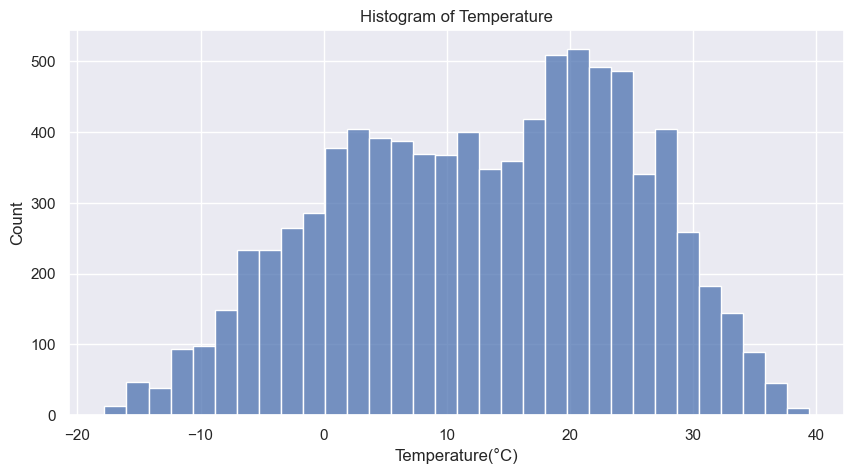

In [20]:
#Histogram of Temperature

sns.histplot(bikes["Temperature(°C)"]).set_title('Histogram of Temperature')
plt.show()

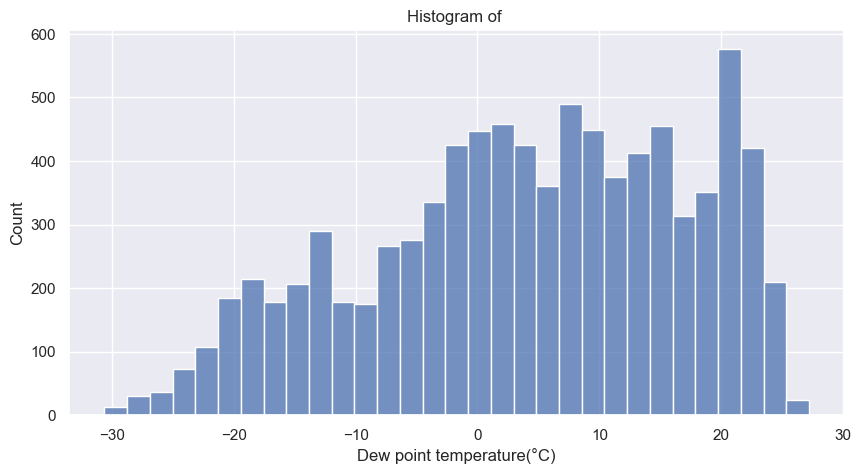

In [21]:
#Histogram of Dew point Temperature

sns.histplot(bikes["Dew point temperature(°C)"]).set_title('Histogram of ')
plt.show()

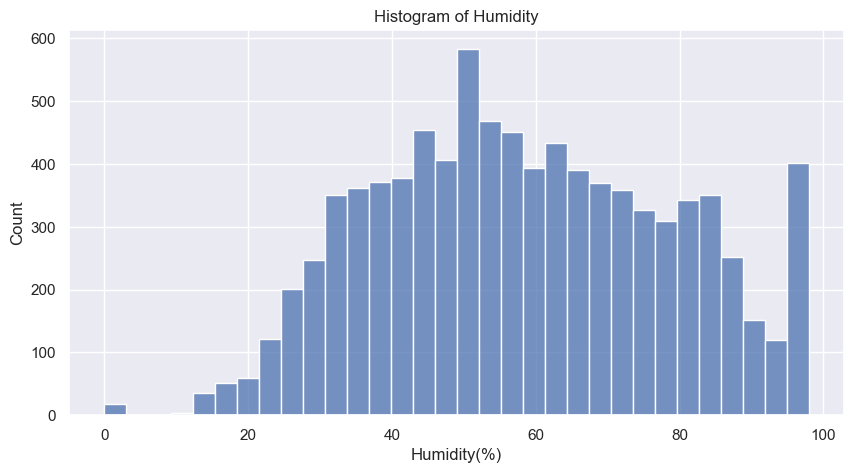

In [22]:
#Histogram of Humidity

sns.histplot(bikes["Humidity(%)"]).set_title('Histogram of Humidity')
plt.show()

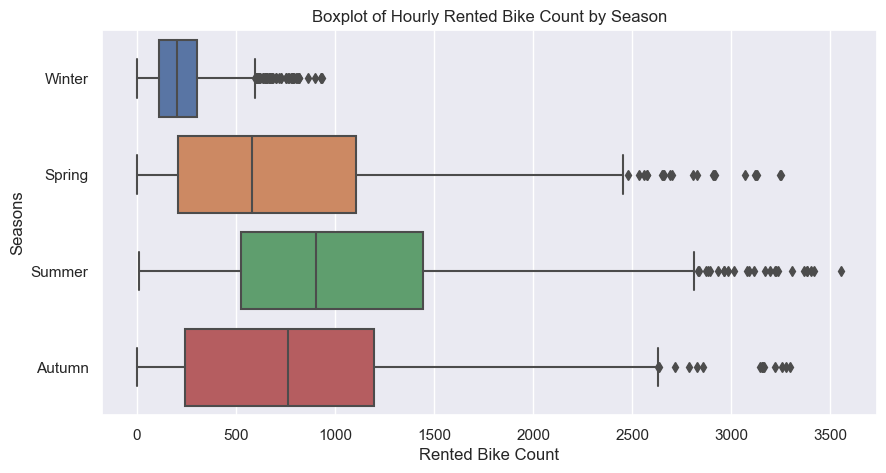

In [23]:
# Boxplot of Hourly Rented Bike Count by Season
sns.boxplot(data = bikes, x ="Rented Bike Count", y = "Seasons", orient="h").set_title("Boxplot of Hourly Rented Bike Count by Season")
plt.show()

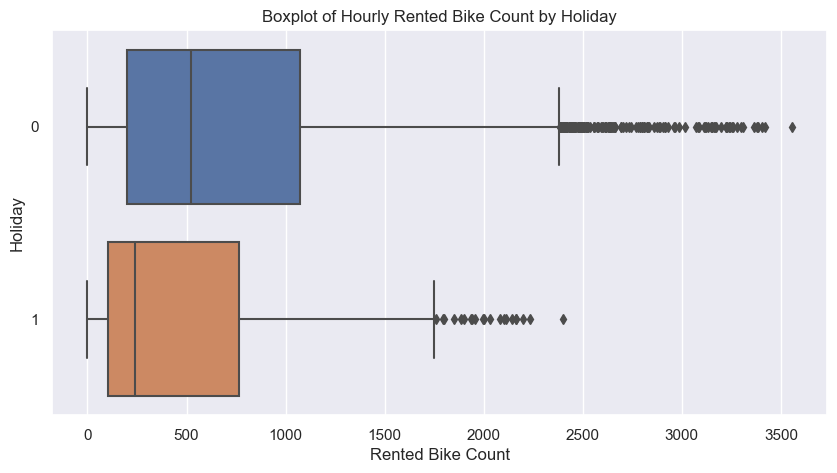

In [24]:
# Boxplot of Hourly Rented Bike Count by Holiday
sns.boxplot(data = bikes, x ="Rented Bike Count", y = "Holiday", orient="h").set_title("Boxplot of Hourly Rented Bike Count by Holiday")
plt.show()

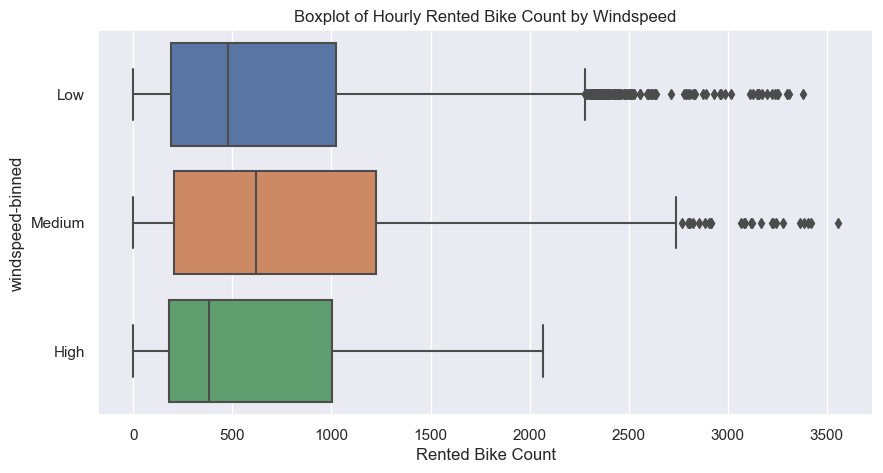

In [25]:
# Boxplot of Hourly Rented Bike Count by Windspeed
sns.boxplot(data = bikes, x ="Rented Bike Count", y = "windspeed-binned", orient="h").set_title("Boxplot of Hourly Rented Bike Count by Windspeed")
plt.show()

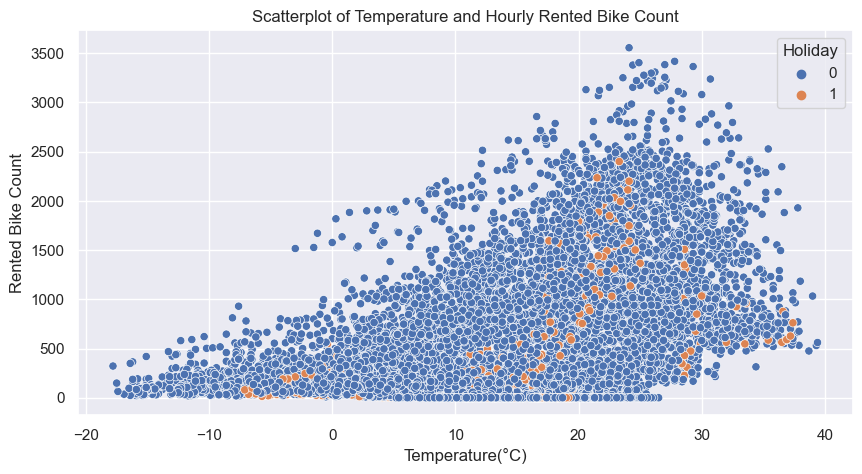

In [26]:
# Scatterplot of Temperature and Hourly Rented Bike Count
sns.scatterplot(data = bikes, x="Temperature(°C)", y="Rented Bike Count", hue="Holiday").set_title("Scatterplot of Temperature and Hourly Rented Bike Count")
plt.show()

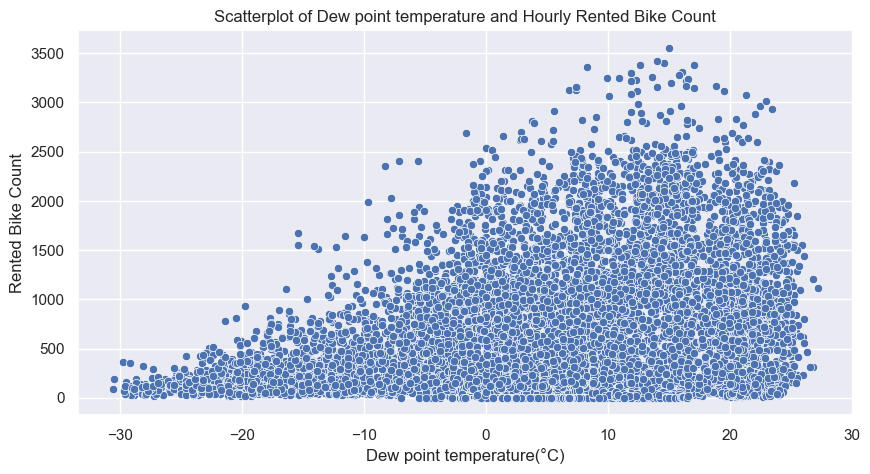

In [27]:
# Scatterplot of Dew point temperature and Hourly Rented Bike Count
sns.scatterplot(data = bikes, x="Dew point temperature(°C)", y="Rented Bike Count").set_title("Scatterplot of Dew point temperature and Hourly Rented Bike Count")
plt.show()

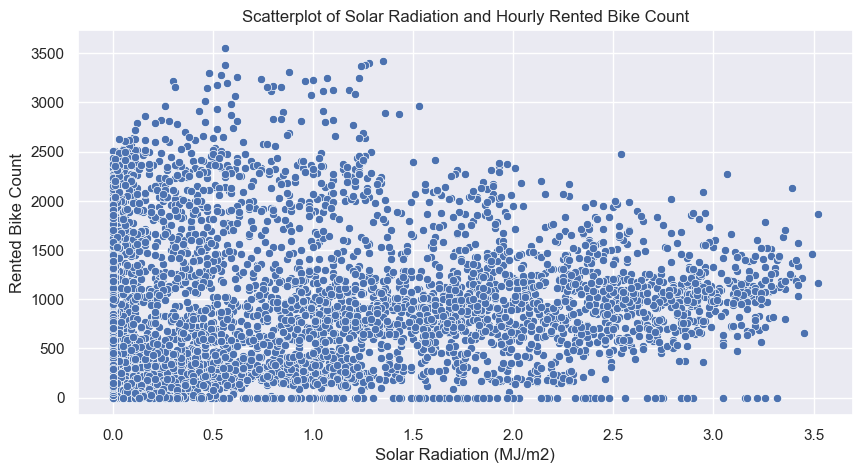

In [28]:
# Scatterplot of Dew point temperature and Hourly Rented Bike Count
sns.scatterplot(data = bikes, x="Solar Radiation (MJ/m2)", y="Rented Bike Count").set_title("Scatterplot of Solar Radiation and Hourly Rented Bike Count")
plt.show()


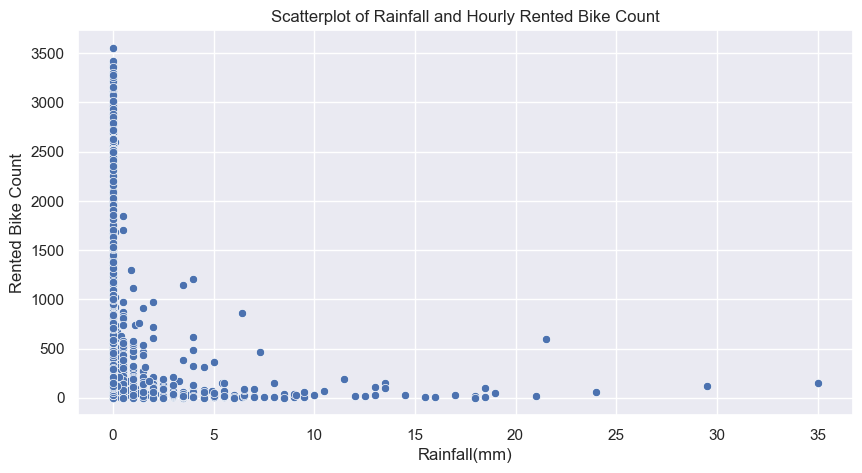

In [29]:
# Scatterplot of Rainfall and Hourly Rented Bike Count
sns.scatterplot(data = bikes, x="Rainfall(mm)", y="Rented Bike Count").set_title("Scatterplot of Rainfall and Hourly Rented Bike Count")
plt.show()

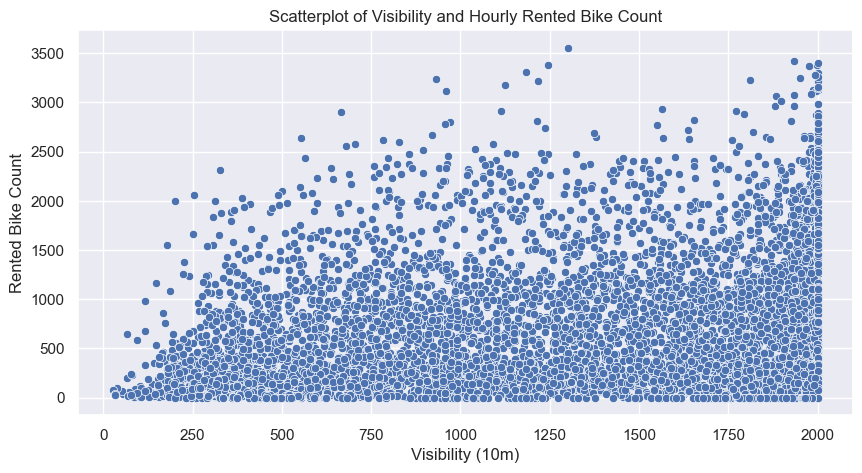

In [30]:
# Scatterplot of Visibility and Hourly Rented Bike Count
sns.scatterplot(data = bikes, x="Visibility (10m)", y="Rented Bike Count").set_title("Scatterplot of Visibility and Hourly Rented Bike Count")
plt.show()

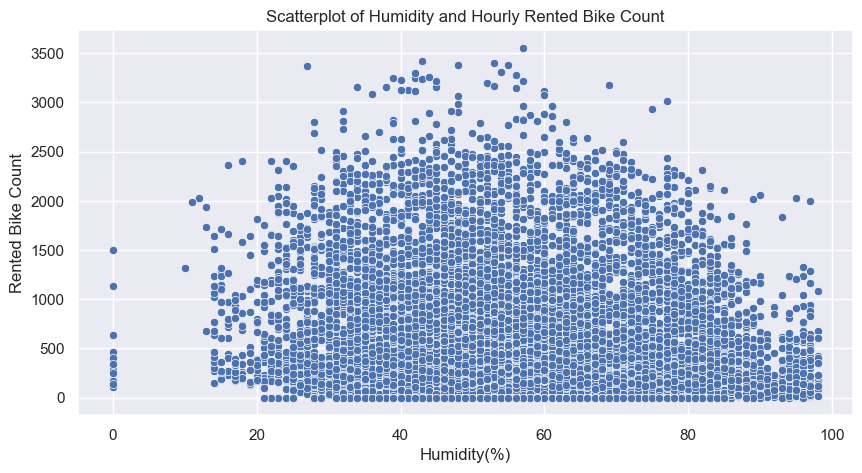

In [31]:
# Scatterplot of Visibility and Hourly Rented Bike Count
sns.scatterplot(data = bikes, x="Humidity(%)", y="Rented Bike Count").set_title("Scatterplot of Humidity and Hourly Rented Bike Count")
plt.show()

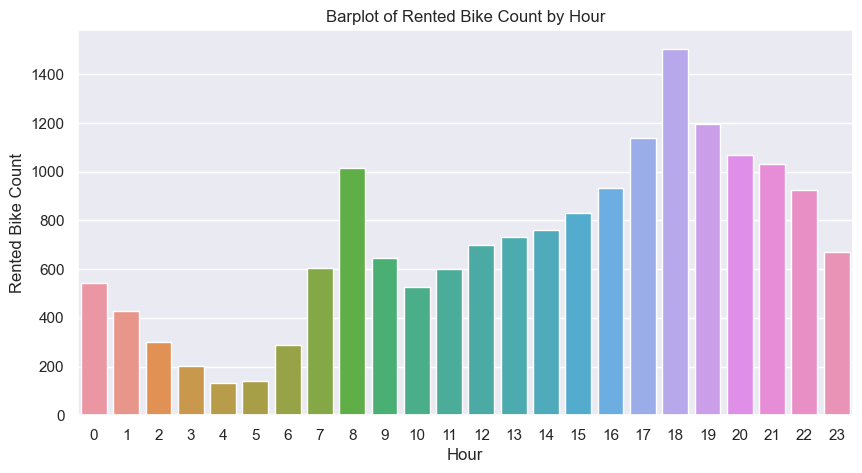

In [32]:
# Barplot of Rented Bike Count by Hour
bikes.groupby('Hour')['Rented Bike Count'].mean()
sns.barplot(data = bikes, x="Hour", y="Rented Bike Count", ci=False).set_title("Barplot of Rented Bike Count by Hour")
plt.show()

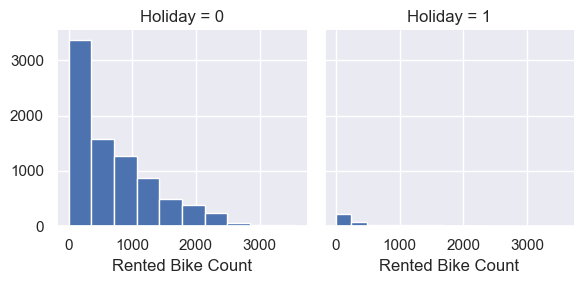

In [33]:
#Histogram of Rented Bike Counts grouped by Holiday

g = sns.FacetGrid(bikes, col = "Holiday")
# Apply a plotting function to each facet's subset of the data
g.map(plt.hist, "Rented Bike Count") 
plt.show()

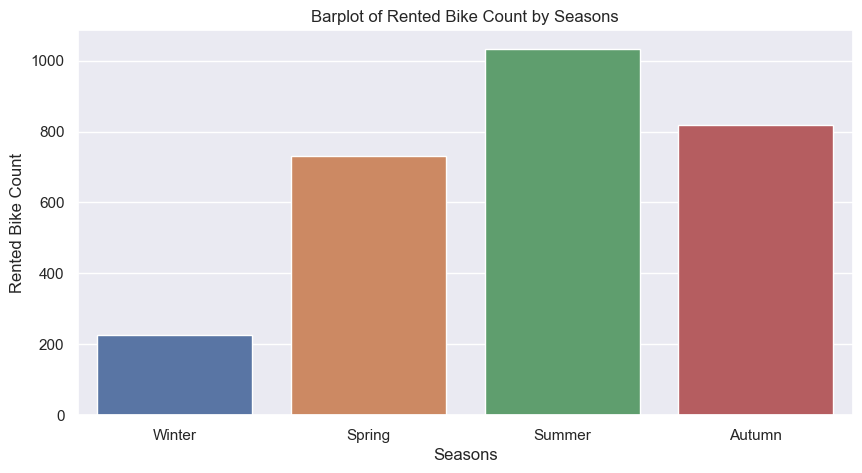

In [34]:
# Barplot of Rented Bike Count by Season
bikes.groupby('Seasons')['Rented Bike Count'].mean()
sns.barplot(data = bikes, x="Seasons", y="Rented Bike Count", ci=False).set_title("Barplot of Rented Bike Count by Seasons")
plt.show()

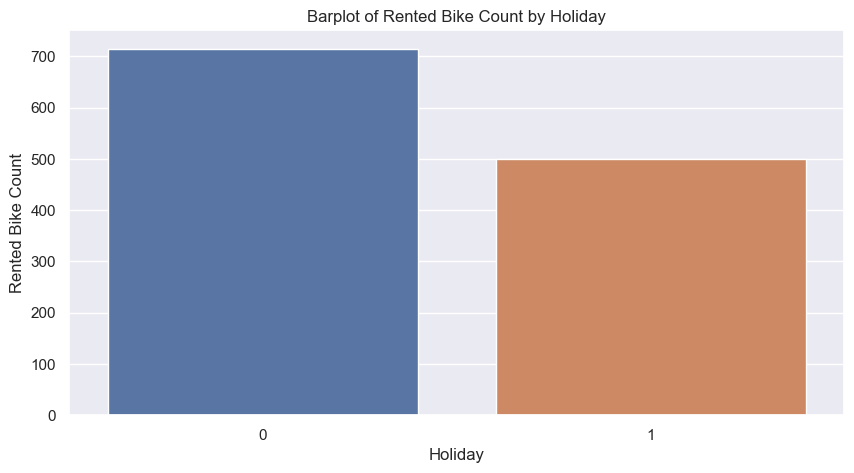

In [35]:
# Barplot of Rented Bike Count by Holiday
bikes.groupby('Holiday')['Rented Bike Count'].mean()
sns.barplot(data = bikes, x="Holiday", y="Rented Bike Count", ci=False).set_title("Barplot of Rented Bike Count by Holiday")
plt.show()

In [36]:
#crosstabs to explore holidays and seasons

cm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(bikes['Seasons'], bikes['Holiday'], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

Holiday,0,1
Seasons,,
Autumn,24.780000,27.780000
Spring,25.650000,16.670000
Summer,25.940000,11.110000
Winter,23.630000,44.440000


### Correlation Testing

In [37]:
bikes.corr()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day
Rented Bike Count,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,-7.233757e-02,0.203943
Hour,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,-1.391486e-16,0.005439
Temperature(°C),0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,-5.593084e-02,-0.050170
Humidity(%),-0.199780,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,-5.027765e-02,-0.020800
Wind speed (m/s),0.121108,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,2.301677e-02,0.005037
Visibility (10m),0.199280,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,3.177281e-02,-0.026000
Dew point temperature(°C),0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,-6.675910e-02,-0.052837
Solar Radiation (MJ/m2),0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,-5.077255e-03,-0.007665
Rainfall(mm),-0.123074,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,-1.426911e-02,0.002055
Snowfall (cm),-0.141804,-2.151645e-02,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,-1.259072e-02,0.032089


In [38]:
# correlation metrics of Rented Bike Count and Temperature
bikes[['Rented Bike Count', 'Temperature(°C)']].corr()

,Rented Bike Count,Temperature(°C)
Rented Bike Count,1.000000,0.538558
Temperature(°C),0.538558,1.000000


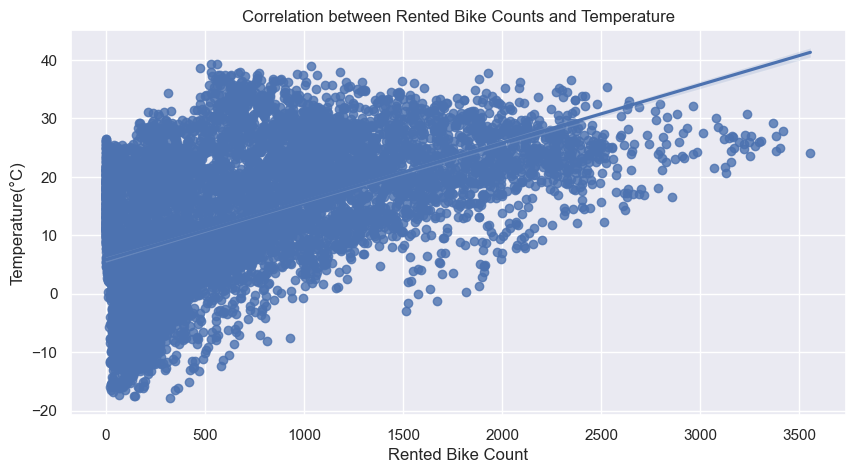

In [39]:
#scatterplot with linear fitted line for Rented Bike Counts and Temperature
sns.regplot(x='Rented Bike Count', y='Temperature(°C)', data=bikes)
plt.title('Correlation between Rented Bike Counts and Temperature')
plt.show()

In [40]:
# calculate the Pearson correlation coefficient and p-value of Rented Bike Count and Temperature
coef, p_val = stats.pearsonr(bikes['Rented Bike Count'], bikes['Temperature(°C)'])
print('Correlation between Rented Bike Count and Temperature, Coeff: {:.4f}, p value: {:.4f}'.format(coef, p_val))

Correlation between Rented Bike Count and Temperature, Coeff: 0.5386, p value: 0.0000


In [41]:
# calculate the Pearson correlation coefficient and p-value of Rented Bike Count and Dew Point Temperature
coef, p_val = stats.pearsonr(bikes['Rented Bike Count'], bikes['Dew point temperature(°C)'])
print('Correlation between Rented Bike Count and Dew point Temperature, Coeff: {:.4f}, p value: {:.4f}'.format(coef, p_val))

Correlation between Rented Bike Count and Dew point Temperature, Coeff: 0.3798, p value: 0.0000


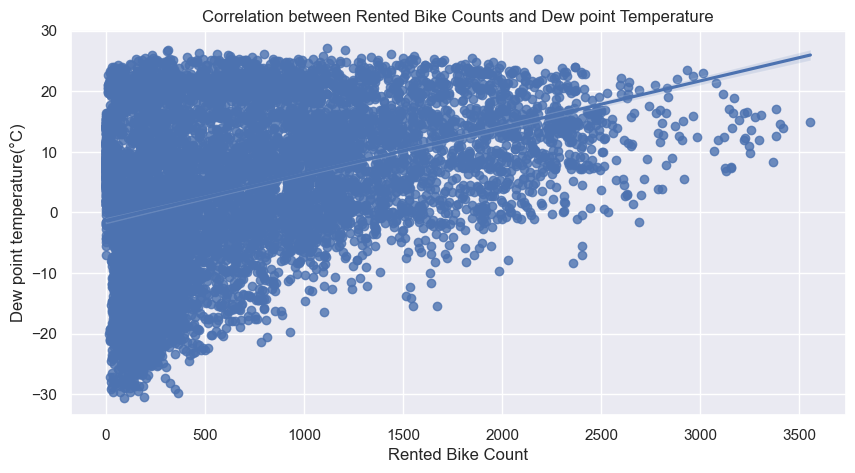

In [42]:
#scatterplot with linear fitted line for Rented Bike Counts and Temperature
sns.regplot(x='Rented Bike Count', y='Dew point temperature(°C)', data=bikes)
plt.title('Correlation between Rented Bike Counts and Dew point Temperature')
plt.show()

In [43]:
# calculate the Pearson correlation coefficient and p-value of Rented Bike Count and Visibility
coef, p_val = stats.pearsonr(bikes['Rented Bike Count'], bikes['Visibility (10m)'])
print('Correlation between Rented Bike Count and Visibility, Coeff: {:.4f}, p value: {:.4f}'.format(coef, p_val))

Correlation between Rented Bike Count and Visibility, Coeff: 0.1993, p value: 0.0000


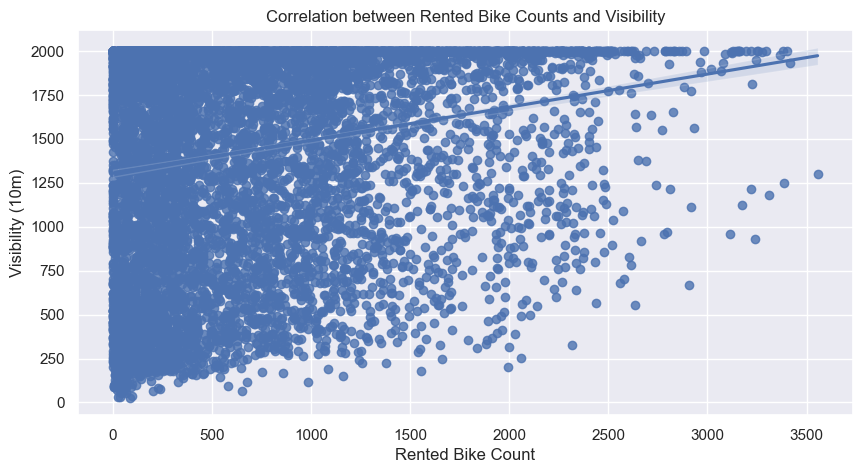

In [44]:
#scatterplot with linear fitted line for Rented Bike Counts and Temperature
sns.regplot(x='Rented Bike Count', y='Visibility (10m)', data=bikes)
plt.title('Correlation between Rented Bike Counts and Visibility')
plt.show()

In [45]:
# calculate the Pearson correlation coefficient and p-value of Rented Bike Count and Solar Radiations
coef, p_val = stats.pearsonr(bikes['Rented Bike Count'], bikes['Solar Radiation (MJ/m2)'])
print('Correlation between Rented Bike Count and Solar Radiation, Coeff: {:.4f}, p value: {:.4f}'.format(coef, p_val))

Correlation between Rented Bike Count and Solar Radiation, Coeff: 0.2618, p value: 0.0000


In [46]:
# calculate the Pearson correlation coefficient and p-value of Rented Bike Count and Rainfall
coef, p_val = stats.pearsonr(bikes['Rented Bike Count'], bikes['Rainfall(mm)'])
print('Correlation between Rented Bike Count and Rainfall, Coeff: {:.4f}, p value: {:.4f}'.format(coef, p_val))

Correlation between Rented Bike Count and Rainfall, Coeff: -0.1231, p value: 0.0000


### Hypothesis Testing

In [47]:
# Test if average rented bike count during holidays and non-holidays are different
nfd_count = bikes[bikes['Holiday'] == 0]['Rented Bike Count']
fd_count = bikes[bikes['Holiday'] == 1]['Rented Bike Count']
t_val, p_val = stats.ttest_ind(nfd_count, fd_count) 
print('T value: {:.4f}, p value: {:.4f}'.format(t_val, p_val))

T value: 6.7874, p value: 0.0000


Sufficient evidence to reject the null that the mean rented bike counts for holidays and non-holidays are similar.  
There is a significant difference between these two categories.

### Regression

In [49]:
# Regress 'Rented Bike Count' on 'Temperature'
X = bikes['Temperature(°C)']
Y = bikes['Rented Bike Count']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     3578.
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:12:58   Log-Likelihood:                -67600.
No. Observations:                8760   AIC:                         1.352e+05
Df Residuals:                    8758   BIC:                         1.352e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             329.9525      8.541     

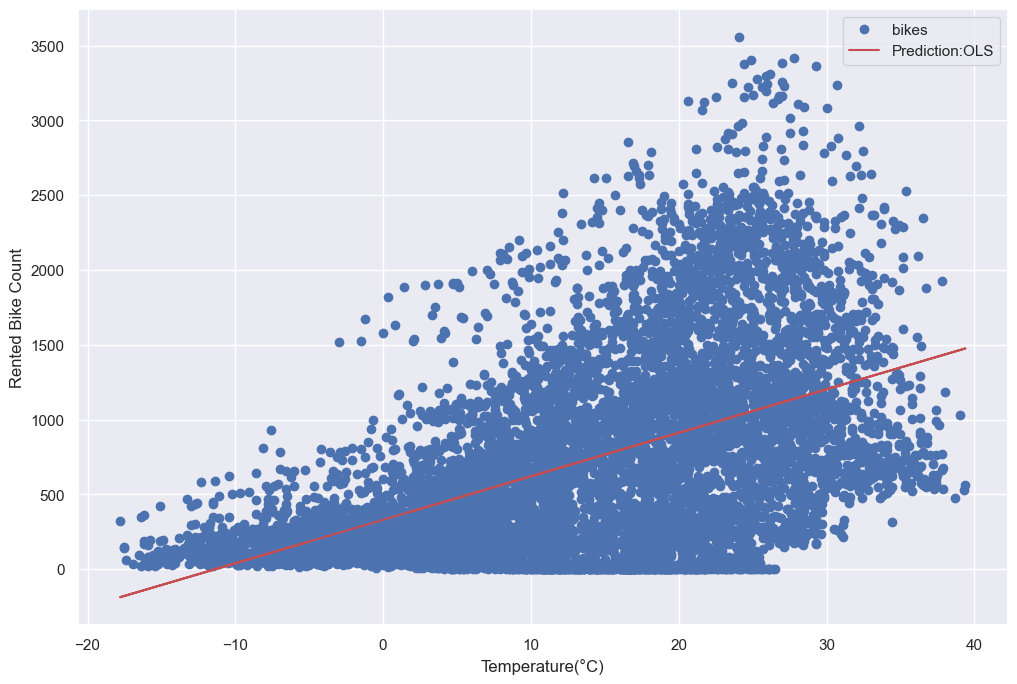

In [50]:
#visualizing the regression line 

ypred =  model.predict(X) 

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(X['Temperature(°C)'], Y, 'o', label="bikes")
ax.plot(X['Temperature(°C)'], model.fittedvalues, 'r', label="Prediction:OLS")
ax.legend(loc="best")
ax.set_xlabel("Temperature(°C)")
ax.set_ylabel("Rented Bike Count")
plt.show()

In [51]:
model.params

const              329.952514
Temperature(°C)     29.081099
dtype: float64

Based on the regression output, the regression equation is:

Rented Bike Count = 329.95 + (29.08 * Temperature)

In [52]:
# Regress 'Rented Bike Count' on 'Dew point temperature'
X = bikes['Dew point temperature(°C)']
Y = bikes['Rented Bike Count']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     1476.
Date:                Mon, 14 Nov 2022   Prob (F-statistic):          1.33e-298
Time:                        21:12:59   Log-Likelihood:                -68418.
No. Observations:                8760   AIC:                         1.368e+05
Df Residuals:                    8758   BIC:                         1.369e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

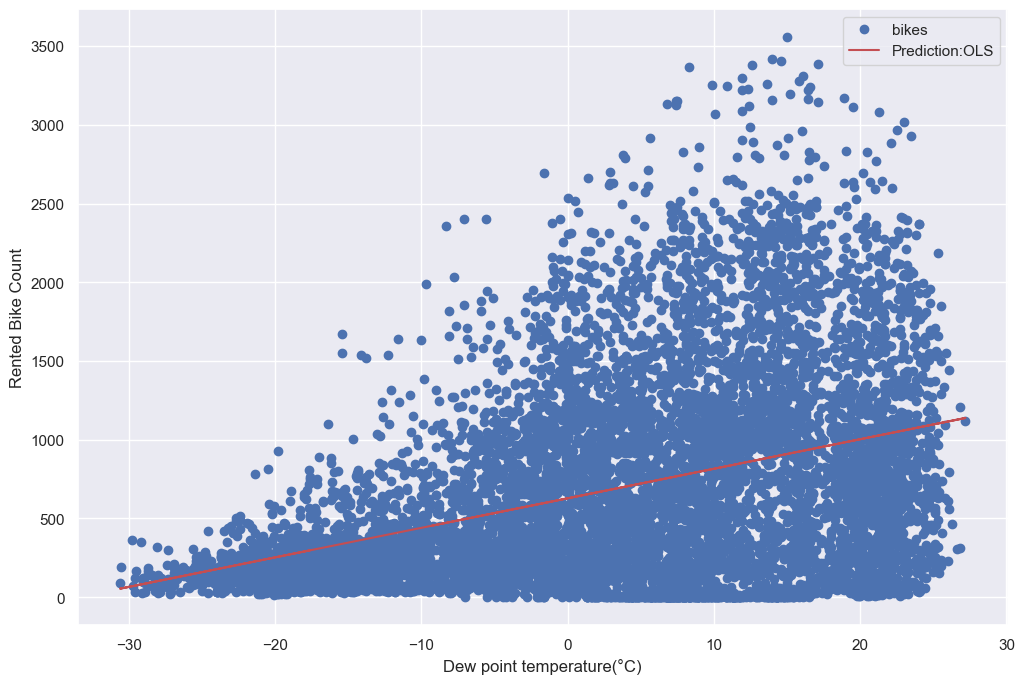

In [53]:
#visualizing the regression line 

ypred =  model.predict(X) 

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(X['Dew point temperature(°C)'], Y, 'o', label="bikes")
ax.plot(X['Dew point temperature(°C)'], model.fittedvalues, 'r', label="Prediction:OLS")
ax.legend(loc="best")
ax.set_xlabel("Dew point temperature(°C)")
ax.set_ylabel("Rented Bike Count")
plt.show()

In [54]:
model.params

const                        628.192971
Dew point temperature(°C)     18.756160
dtype: float64

In [55]:
# Regress 'Rented Bike Count' on 'Rainfall'
X = bikes['Rainfall(mm)']
Y = bikes['Rented Bike Count']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     134.7
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           6.46e-31
Time:                        21:12:59   Log-Likelihood:                -69033.
No. Observations:                8760   AIC:                         1.381e+05
Df Residuals:                    8758   BIC:                         1.381e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          715.0640      6.899    103.655   

In [56]:
model.params

const           715.064048
Rainfall(mm)    -70.362424
dtype: float64

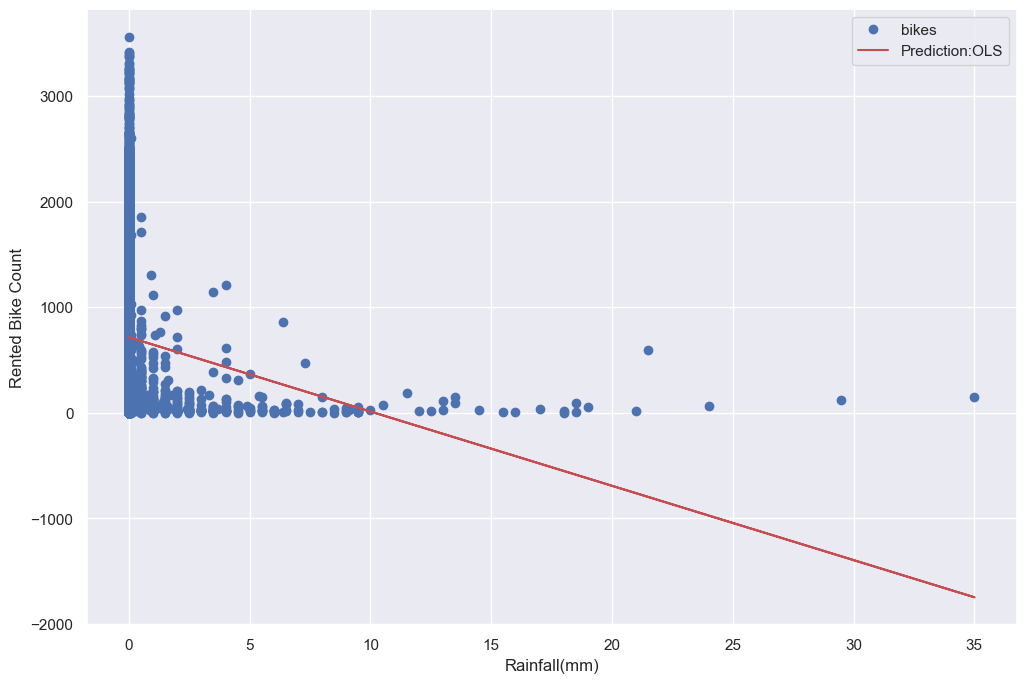

In [57]:
#visualizing the regression line 

ypred =  model.predict(X) 

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(X['Rainfall(mm)'], Y, 'o', label="bikes")
ax.plot(X['Rainfall(mm)'], model.fittedvalues, 'r', label="Prediction:OLS")
ax.legend(loc="best")
ax.set_xlabel("Rainfall(mm)")
ax.set_ylabel("Rented Bike Count")
plt.show()

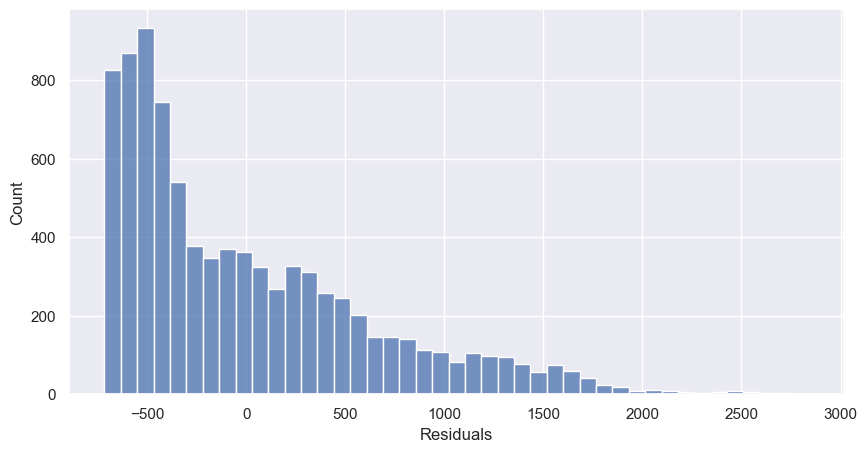

In [58]:
#Histogram of Normalized Residuals 

sns.histplot(model.resid)
plt.xlabel('Residuals')
plt.show()

In [104]:
#Regress Rented Bike Count on Temperature, Visibility, Hour, Holiday and Solar Radiation 
X_col = ['Temperature(°C)', 'Visibility (10m)','Hour','Holiday','Solar Radiation (MJ/m2)']
X = bikes[X_col]
Y = bikes['Rented Bike Count']
X = sm.add_constant(X)
model2 = sm.OLS(Y, X).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     1346.
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        22:23:48   Log-Likelihood:                -66602.
No. Observations:                8760   AIC:                         1.332e+05
Df Residuals:                    8754   BIC:                         1.333e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -

In [105]:
#Compute VIF Values

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(2)

,VIF Factor,features
0,9.40,const
1,1.15,Temperature(°C)
2,1.03,Visibility (10m)
3,1.03,Hour
4,1.00,Holiday
5,1.18,Solar Radiation (MJ/m2)


eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


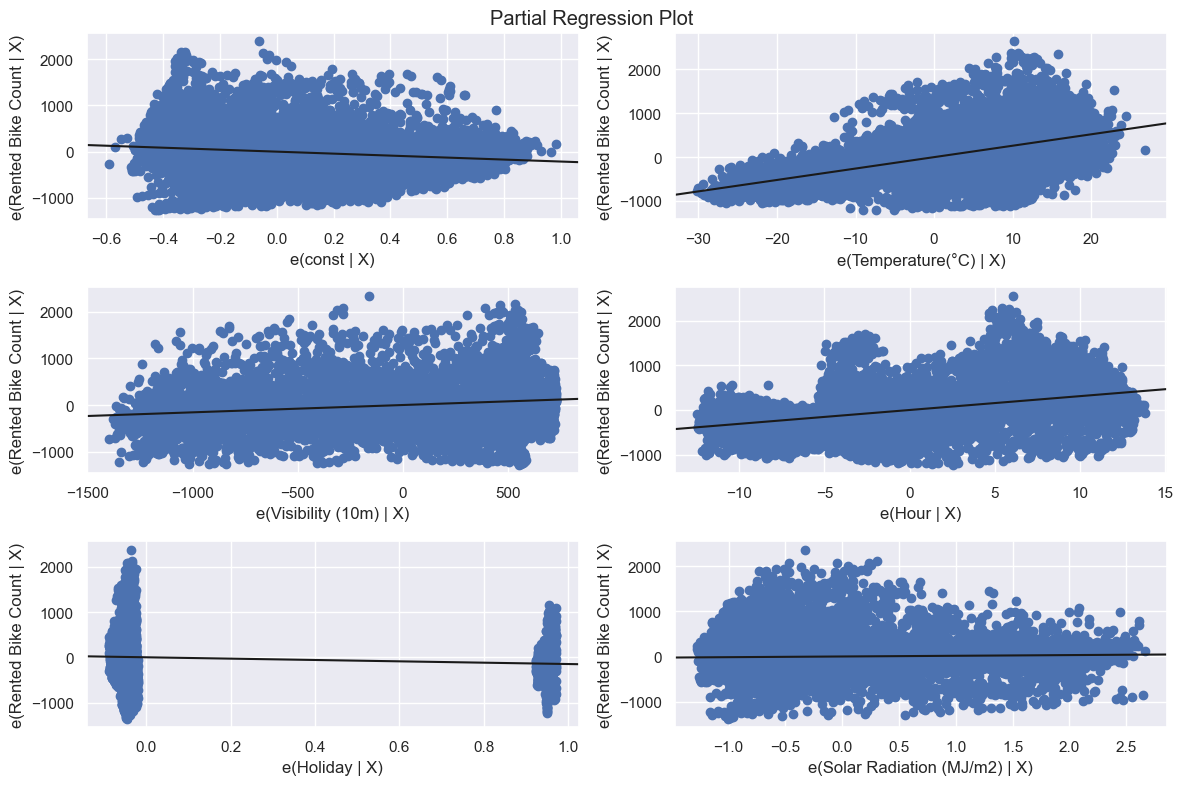

In [106]:
#visualize regression plots


fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model2, fig=fig)
plt.show()

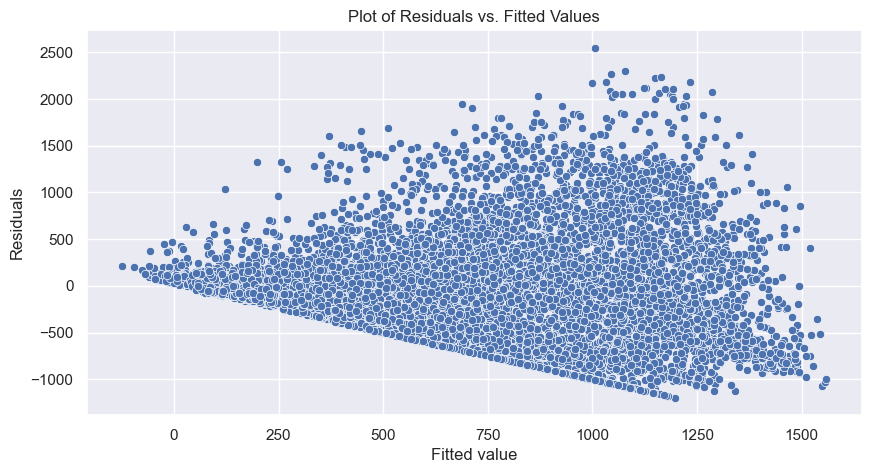

In [86]:
#Scatter plot of residuals and fitted values

sns.scatterplot(x=model2.fittedvalues, y=model2.resid)
plt.title('Plot of Residuals vs. Fitted Values')
plt.xlabel('Fitted value')
plt.ylabel('Residuals')
plt.show()

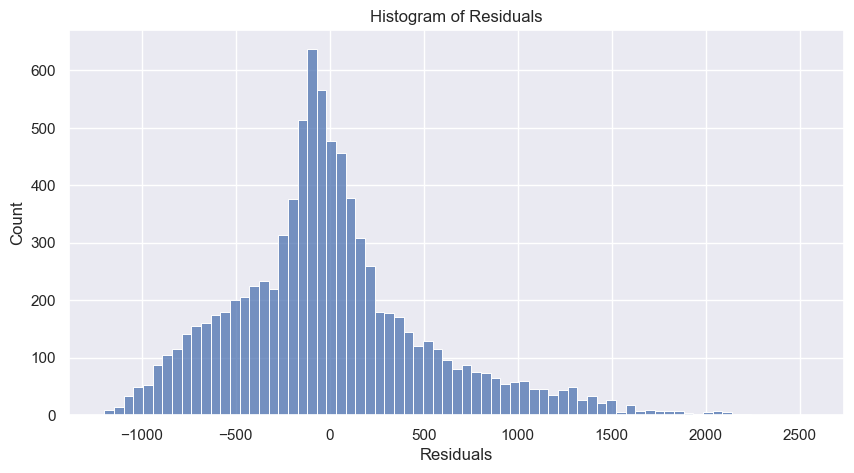

In [87]:
#Histogram of residuals

sns.histplot(model2.resid)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()

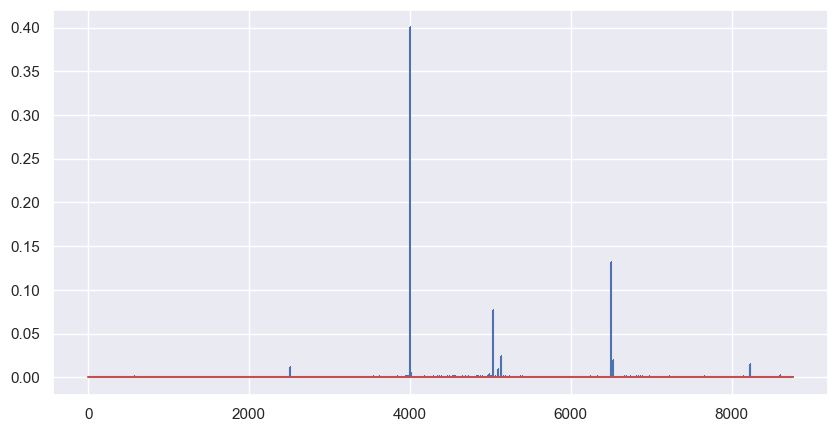

In [88]:
#influence cook distance to understand outliers

(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",", use_line_collection=True)
plt.show()

In [76]:
# Getting influential analysis
influence = model2.get_influence()
print(influence.summary_table())

       obs      endog     fitted     Cook's   student.   hat diag    dffits   ext.stud.     dffits
                           value          d   residual              internal   residual           
--------------------------------------------------------------------------------------------------
         0    254.000    284.037      0.000     -0.057      0.000     -0.001     -0.057     -0.001
         1    204.000    275.303      0.000     -0.136      0.000     -0.003     -0.136     -0.003
         2    173.000    260.745      0.000     -0.167      0.001     -0.004     -0.167     -0.004
         3    107.000    254.922      0.000     -0.282      0.001     -0.006     -0.282     -0.006
         4     78.000    260.745      0.000     -0.348      0.001     -0.008     -0.348     -0.008
         5    100.000    249.098      0.000     -0.284      0.001     -0.006     -0.284     -0.006
         6    181.000    243.275      0.000     -0.119      0.001     -0.003     -0.119     -0.003
         7

### Interpretation of Results

The Hourly Rented Bike Count is heavily skewed right and is influenced by multiple different variables.  From the boxplot, we determined that the most bikes are rented during the summer, whereas very few bikes are rented in the winter.  From the barplot, we determined that the heaviest demand for bikes is typically around 8am and 5pm, presumably because this is when people travel to and from work.  We could not tell from the scatterplot if there was a significant difference in mean rented bike counts for holidays and non-holidays so we hypothesis tested this and determined that there was a significant difference.  Additionally, we performed correlation testing on Rented Bike Count and Temperature and determined that there is a moderate positive relationship, and performed linear regression to confirm this.  Finally, we performed multiple linear regression on Rented Bike Count, using Temperature,Visibility,Hour,Holiday and Solar Radiation and determined that all of these variables together have a significant impact on the Rented Bike Count.